In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from textblob import TextBlob
from gensim import corpora, models
from gensim.models import Word2Vec
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

# 读取数据和预处理
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None


In [2]:
# 生成生气和愤怒的评论，确保每条评论包含至少一个关键词
angry_comments_with_keywords_continued = [
    "This Samsung phone is absolutely terrible! It's slow and unresponsive.",
    "I can't believe how bad this Apple iPhone is. Waste of money!",
    "The Android phone's battery life is abysmal. It dies within hours!",
    "Do not buy this iOS phone. It's a complete disaster!",
    "The touchscreen quality is atrocious on this Samsung phone.",
    "I'm so disappointed with this GPS feature. It's just not accurate.",
    "This Bluetooth connection keeps dropping. It's driving me insane!",
    "I'm furious with the NFC functionality on this phone. It's not working properly.",
    "Avoid this facial recognition feature at all costs. It's unreliable.",
    "I regret buying this fingerprint scanner. It's not secure at all.",
    "I've never been so angry about a SIM card slot. It's flimsy and breaks easily.",
    "I can't even express how frustrated I am with this waterproof claim. My phone got damaged in the rain!",
    "This phone claims to be dustproof, but it's full of dust inside!",
    "The charging port on this phone is terrible. It's loose and won't hold the cable properly.",
    "I'm seething with anger over this wireless charging feature. It's so slow!",
    "This 5G phone is a nightmare. Constantly losing connection!",
    "The screen resolution on this phone is awful. Everything looks pixelated.",
    "I'm absolutely furious with this processor. It's slower than my old phone.",
    "This phone's RAM is a joke. Can't run more than one app at a time!",
    "The storage capacity of this phone is pathetic. Can't even store all my photos.",
    "I'm beyond disappointed with this battery. It drains so quickly!",
    "This camera quality is atrocious. Pictures come out blurry and grainy.",
    "The pixel density on this phone's screen is terrible. Can't see anything clearly.",
    "I'm so angry about this refresh rate. The screen flickers constantly!",
    "The user interface on this phone is a disaster. It's confusing and hard to navigate.",
    "I'm infuriated by the lack of updates on this phone. Still running an outdated OS!",
    "This chipset is garbage. Can't handle basic tasks without lagging.",
    "The display on this phone is terrible. Colors are washed out and dull.",
    "I'm seething with anger over this audio quality. Can't even hear properly!",
    "This video playback is a joke. Constant buffering and freezing.",
    "I'm absolutely furious with this photo quality. Can't take a decent picture!",
    "The price of this phone is outrageous. Not worth the money at all.",
    "I'm beyond disappointed with the quality of this phone. It's cheaply made.",
    "This phone's design is a disaster. It's ugly and uncomfortable to hold.",
    "I'm so frustrated with the lack of features on this phone. It's so basic!",
    "This phone is a complete letdown. None of the advertised features work properly."
    "This phone's battery is worse than a Nokia from the '90s. Absolutely pathetic!",
    "I'm so angry with this Apple iPhone. It's supposed to be premium, but it feels like a toy!",
    "The Android operating system on this phone is a disaster. Constantly crashing and freezing.",
    "I'm seething with anger over this Samsung phone's GPS. It keeps leading me in the wrong direction!",
    "The Bluetooth on this phone is a joke. Can't even connect to my headphones properly.",
    "I'm furious with this NFC feature. It's supposed to make payments easier, but it never works!",
    "Avoid this facial recognition feature like the plague. It's a security risk!",
    "I regret buying this fingerprint scanner. It's supposed to be secure, but anyone can bypass it!",
    "I'm beyond disappointed with this SIM card slot. It's so flimsy, it broke within a week!",
    "This waterproof claim is a lie! Dropped my phone in a puddle and it stopped working immediately!",
    "This dustproof claim is a joke. There's dust inside the camera lens!",
    "I'm absolutely livid with this wireless charging. It's so slow, I might as well use a cable!",
    "This 5G phone can't even get a decent signal. What's the point of paying extra for it?",
    "The screen resolution on this phone is worse than my old flip phone from the '00s.",
    "This processor is slower than a snail. Can't even open basic apps without waiting!",
    "I'm so angry about this phone's RAM. It's like trying to run Windows 10 on a potato!",
    "This phone's storage is a joke. Can't even download a few apps without running out of space!",
    "The battery life on this phone is a disgrace. Can't even last half a day!",
    "This camera is worse than a disposable one from a dollar store. Can't get a clear picture!",
    "The pixel density on this screen is terrible. Can't see anything in sunlight!",
    "I'm beyond disappointed with this refresh rate. Feels like I'm staring at a flickering candle!",
    "This user interface is a nightmare. It's like they let a child design it!",
    "I'm infuriated by the lack of updates. Still running the same version from two years ago!",
    "This chipset is a joke. Can't handle anything more than sending a text!",
    "The display on this phone is garbage. Looks like I'm viewing everything through fog!",
    "I'm seething with anger over this audio quality. Can't even listen to music without distortion!",
    "This video playback is worse than a VHS tape from the '80s. Constantly stuttering and buffering!",
    "I'm absolutely furious with this phone's photo quality. Might as well use a potato to take pictures!",
    "This phone's price is laughable. They should pay me to use it!",
    "I'm beyond disappointed with the quality of this phone. Feels like it's going to fall apart any moment!",
    "This phone's design is an insult to my eyes. Did they even bother to hire a designer?",
    "I'm so frustrated with the lack of features. My old flip phone had more functionality than this!",
    "This phone is a complete waste of money. Don't make the same mistake I did!"
]
new_reviews_df = pd.DataFrame({'Reviews': angry_comments_with_keywords_continued})

# 将新评论数据框与原始数据框合并
df = pd.concat([df, new_reviews_df], ignore_index=True)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413908 entries, 0 to 413907
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  float64
 4   Reviews       413838 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(3), object(3)
memory usage: 18.9+ MB
None


In [3]:
keywords = [
    "Samsung", "Apple", "Iphone","Android", "iOS", "touchscreen", 
    "GPS", "Bluetooth", "NFC", "facial", "fingerprint", "SIM", 
    "waterproof", "dustproof", "charging", "wireless", "5G",
    "screen", "resolution", "processor", "RAM", "storage", 
    "battery", "camera", "pixel", "refresh", "interface", 
    "updates", "chipset", "display", "audio", "video", 
    "photo", "price", "quality", "design", "features"
]

keywords_lower = [keyword.lower() for keyword in keywords]

# 修改的函数来检查评论中是否包含关键词列表中的任何一个单词
def contains_keyword(review):
    # 检查评论是否为字符串类型
    if isinstance(review, str):
        review_lower = review.lower()
        return any(keyword in review_lower for keyword in keywords_lower)
    else:
        # 如果不是字符串，假定它不包含任何关键词
        return False

# 应用这个函数来过滤数据框
df = df[df['Reviews'].apply(contains_keyword)]

print(df.info())

df = df.drop_duplicates(subset=['Reviews'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 165107 entries, 1 to 413906
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  165040 non-null  object 
 1   Brand Name    140406 non-null  object 
 2   Price         162616 non-null  float64
 3   Rating        165040 non-null  float64
 4   Reviews       165107 non-null  object 
 5   Review Votes  159348 non-null  float64
dtypes: float64(3), object(3)
memory usage: 8.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 76567 entries, 1 to 413906
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  76500 non-null  object 
 1   Brand Name    64841 non-null  object 
 2   Price         75221 non-null  float64
 3   Rating        76500 non-null  float64
 4   Reviews       76567 non-null  object 
 5   Review Votes  75771 non-null  float64
dtypes: float64(3), object(3)
memory u

In [4]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

df['Processed_Reviews'] = df['Reviews'].apply(preprocess_text)

# 情感分析
def analyze_sentiment(text):
    blob = TextBlob(' '.join(text))
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df['Polarity'], df['Subjectivity'] = zip(*df['Processed_Reviews'].apply(analyze_sentiment))

# 主题建模(LDA)
texts = df['Processed_Reviews'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda_model = models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=4)
df['Topic'] = [sorted(lda_model[dictionary.doc2bow(text)], key=lambda x: x[1], reverse=True)[0][0] for text in texts]

# 词嵌入和聚类
word2vec_model = Word2Vec(df['Processed_Reviews'].tolist(), vector_size=100, window=5, min_count=1, workers=4)
word_vectors = word2vec_model.wv

def get_embedding(words):
    return [word_vectors[word] for word in words if word in word_vectors]

df['Embedding'] = df['Processed_Reviews'].apply(get_embedding)
df = df[df['Embedding'].map(lambda x: len(x) > 0)]
X = df['Embedding'].tolist()
X = [sum(x)/len(x) for x in X]

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

kmeans = MiniBatchKMeans(n_clusters=5)
kmeans.fit(X_reduced)
df['Cluster'] = kmeans.labels_

# 分析聚类结果
from collections import Counter

for cluster_id in range(5):
    cluster_reviews = df[df['Cluster'] == cluster_id]['Processed_Reviews']
    cluster_reviews = [word for review in cluster_reviews for word in review]
    common_words = Counter(cluster_reviews).most_common(10)
    print(f"Cluster {cluster_id} most common words: {common_words}")
    
    cluster_topics = df[df['Cluster'] == cluster_id]['Topic']
    topic_counts = Counter(cluster_topics)
    print(f"Cluster {cluster_id} topic distribution: {topic_counts}")
    
    cluster_sentiments = df[df['Cluster'] == cluster_id][['Polarity', 'Subjectivity']].mean()
    print(f"Cluster {cluster_id} average sentiment: Polarity {cluster_sentiments['Polarity']}, Subjectivity {cluster_sentiments['Subjectivity']}")


from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(' '.join(text))
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    if polarity > 0.5:
        sentiment = 'Joy'
    elif polarity > 0.1:
        sentiment = 'Surprise'
    elif polarity < -0.5:
        sentiment = 'Anger'
    elif polarity < -0.1:
        sentiment = 'Disappointment'
    else:
        sentiment = 'Neutral'
    
    return polarity, subjectivity, sentiment

df['Polarity'], df['Subjectivity'], df['Sentiment'] = zip(*df['Processed_Reviews'].apply(analyze_sentiment))

c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Cluster 0 most common words: [('phone', 16703), ('battery', 9301), ('screen', 4251), ('charge', 2987), ('one', 2565), ('would', 2429), ('good', 2007), ('time', 1964), ('day', 1912), ('new', 1907)]
Cluster 0 topic distribution: Counter({1: 7319, 0: 1821, 4: 1599, 3: 69, 2: 1})
Cluster 0 average sentiment: Polarity 0.07671302770643113, Subjectivity 0.44658031193456593
Cluster 1 most common words: [('phone', 60817), ('screen', 15017), ('good', 11961), ('like', 11838), ('use', 11491), ('great', 10561), ('battery', 10515), ('camera', 10355), ('one', 10134), ('get', 8477)]
Cluster 1 topic distribution: Counter({4: 9811, 3: 7249, 1: 2619, 0: 2127, 2: 671})
Cluster 1 average sentiment: Polarity 0.20029586547384326, Subjectivity 0.5174307643566363
Cluster 2 most common words: [('phone', 25494), ('great', 8953), ('good', 6833), ('price', 5291), ('love', 4560), ('screen', 4112), ('like', 4092), ('one', 3850), ('iphone', 3847), ('camera', 3218)]
Cluster 2 topic distribution: Counter({0: 9709, 4: 6

In [5]:
print(df.head())

                                        Product Name Brand Name   Price  \
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
6  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
7  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
8  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
9  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
1     4.0  nice phone, nice up grade from my pantach revu...           0.0   
6     2.0  The charging port was loose. I got that solder...           0.0   
7     2.0  Phone looks good but wouldn't stay charged, ha...           0.0   
8     5.0  I originally was using the Samsung S2 Galaxy f...           0.0   
9     3.0  It's battery life is great. It's very responsi...           0.0   

                                   Processed_Reviews  Polarity  Subjectivity  \


In [6]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# 将评论转换为TF-IDF矩阵
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(df['Processed_Reviews'].apply(' '.join))

# 应用NMF
nmf_model = NMF(n_components=5, random_state=1).fit(tfidf)

# 获取主题-词矩阵
tfidf_feature_names = vectorizer.get_feature_names_out()
topic_word_matrix = pd.DataFrame(nmf_model.components_, columns=tfidf_feature_names)

# 打印每个主题的顶部词
num_top_words = 10
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [tfidf_feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    print(f"Topic {topic_idx}:", ' '.join(top_words))
    
# 为每个评论分配主题
topic_labels = nmf_model.transform(tfidf).argmax(axis=1)
df['Topic'] = topic_labels

Topic 0: phone screen like use love camera iphone really new phones
Topic 1: great price phone works love product fast awesome excellent nice
Topic 2: good price quality excellent product camera nice phone fast really
Topic 3: sim card work phone unlocked att dual works tmobile cards
Topic 4: battery life charge long day hours phone charger bad doesnt


In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

# 将情感标签转换为数字
sentiment_map = {'Joy': 0, 'Surprise': 1, 'Neutral': 2, 'Disappointment': 3, 'Anger': 4}

# 将文本转换为词嵌入向量
def text_to_embedding(text, word2vec):
    words = word_tokenize(text)
    vectors = [word2vec.wv[word] for word in words if word in word2vec.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)


# 将数据分成训练集和测试集
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 训练Word2Vec模型
documents = train_df['Processed_Reviews'].tolist()
word2vec = Word2Vec(documents, vector_size=100, window=5, min_count=1, workers=4)

# 准备数据加载器
X_train = np.array([text_to_embedding(' '.join(text), word2vec) for text in train_df['Processed_Reviews']])
y_train_sentiment = np.array([sentiment_map[sentiment] for sentiment in train_df['Sentiment']])
y_train_topic = np.array(train_df['Topic'])

X_test = np.array([text_to_embedding(' '.join(text), word2vec) for text in test_df['Processed_Reviews']])
y_test_sentiment = np.array([sentiment_map[sentiment] for sentiment in test_df['Sentiment']])
y_test_topic = np.array(test_df['Topic'])


class SentimentTopicModel(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, sentiment_classes, topic_classes):
        super(SentimentTopicModel, self).__init__()
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_sentiment = nn.Linear(hidden_dim, sentiment_classes)
        self.fc_topic = nn.Linear(hidden_dim, topic_classes)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        sentiment = self.fc_sentiment(x)
        topic = self.fc_topic(x)
        return sentiment, topic


print("X_train shape:", X_train.shape)

X_train shape: (61253, 100)


In [8]:
# 超参数
embedding_dim = 100
hidden_dim = 200
sentiment_classes = len(sentiment_map)
topic_classes = df['Topic'].nunique()
dropout = 0.5
learning_rate = 0.001
num_epochs = 50

# 初始化模型
model = SentimentTopicModel(embedding_dim, hidden_dim, sentiment_classes, topic_classes)

# 定义损失函数和优化器
criterion_sentiment = nn.CrossEntropyLoss()
criterion_topic = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    # 前向传递
    sentiment_outputs, topic_outputs = model(torch.from_numpy(X_train).float())
    
    # 计算损失
    sentiment_loss = criterion_sentiment(sentiment_outputs, torch.from_numpy(y_train_sentiment).long())
    topic_loss = criterion_topic(topic_outputs, torch.from_numpy(y_train_topic).long())
    loss = sentiment_loss + topic_loss
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# %%
model.eval()
with torch.no_grad():
    sentiment_outputs, topic_outputs = model(torch.from_numpy(X_test).float())
    _, sentiment_predictions = torch.max(sentiment_outputs, 1)
    _, topic_predictions = torch.max(topic_outputs, 1)

print(f'Sentiment Accuracy: {accuracy_score(y_test_sentiment, sentiment_predictions):.4f}')
print(f'Sentiment F1 Score: {f1_score(y_test_sentiment, sentiment_predictions, average="weighted"):.4f}')
print(f'Topic Accuracy: {accuracy_score(y_test_topic, topic_predictions):.4f}')
print(f'Topic F1 Score: {f1_score(y_test_topic, topic_predictions, average="weighted"):.4f}')

num_epochs = 2500
train_losses = []
val_losses = []

# 训练模型
for epoch in range(num_epochs):
    # 前向传递
    sentiment_outputs, topic_outputs = model(torch.from_numpy(X_train).float())
    
    # 计算损失
    sentiment_loss = criterion_sentiment(sentiment_outputs, torch.from_numpy(y_train_sentiment).long())
    topic_loss = criterion_topic(topic_outputs, torch.from_numpy(y_train_topic).long())
    loss = sentiment_loss + topic_loss
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 记录训练损失
    train_losses.append(loss.item())
    
    if (epoch + 1) % 10 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 在测试集上评估模型
model.eval()
with torch.no_grad():
    sentiment_outputs, topic_outputs = model(torch.from_numpy(X_test).float())
    sentiment_loss = criterion_sentiment(sentiment_outputs, torch.from_numpy(y_test_sentiment).long())
    topic_loss = criterion_topic(topic_outputs, torch.from_numpy(y_test_topic).long())
    val_loss = sentiment_loss + topic_loss
    
    # 记录验证损失
    val_losses.append(val_loss.item())
    
    _, sentiment_predictions = torch.max(sentiment_outputs, 1)
    _, topic_predictions = torch.max(topic_outputs, 1)

# 将Tensor转换回NumPy数组
sentiment_predictions = sentiment_predictions.numpy()
topic_predictions = topic_predictions.numpy()

print(f'Sentiment Accuracy: {accuracy_score(y_test_sentiment, sentiment_predictions):.4f}')
print(f'Sentiment F1 Score: {f1_score(y_test_sentiment, sentiment_predictions, average="weighted"):.4f}')
print(f'Topic Accuracy: {accuracy_score(y_test_topic, topic_predictions):.4f}')
print(f'Topic F1 Score: {f1_score(y_test_topic, topic_predictions, average="weighted"):.4f}')


Epoch [5/50], Loss: 2.8740
Epoch [10/50], Loss: 2.5104
Epoch [15/50], Loss: 2.3291
Epoch [20/50], Loss: 2.1431
Epoch [25/50], Loss: 1.9328
Epoch [30/50], Loss: 1.7934
Epoch [35/50], Loss: 1.6934
Epoch [40/50], Loss: 1.6160
Epoch [45/50], Loss: 1.5528
Epoch [50/50], Loss: 1.5015
Sentiment Accuracy: 0.6418
Sentiment F1 Score: 0.5943
Topic Accuracy: 0.7667
Topic F1 Score: 0.7552
Epoch [10/2500], Loss: 1.4135
Epoch [20/2500], Loss: 1.3410
Epoch [30/2500], Loss: 1.2815
Epoch [40/2500], Loss: 1.2311
Epoch [50/2500], Loss: 1.1902
Epoch [60/2500], Loss: 1.1568
Epoch [70/2500], Loss: 1.1288
Epoch [80/2500], Loss: 1.1055
Epoch [90/2500], Loss: 1.0866
Epoch [100/2500], Loss: 1.0708
Epoch [110/2500], Loss: 1.0569
Epoch [120/2500], Loss: 1.0468
Epoch [130/2500], Loss: 1.0356
Epoch [140/2500], Loss: 1.0267
Epoch [150/2500], Loss: 1.0182
Epoch [160/2500], Loss: 1.0102
Epoch [170/2500], Loss: 1.0036
Epoch [180/2500], Loss: 0.9969
Epoch [190/2500], Loss: 0.9909
Epoch [200/2500], Loss: 0.9864
Epoch [210

In [9]:
# 示例评论
sample_reviews = [
    "Wow, I'm blown away by this phone! The camera quality is out of this world, and the screen is so vibrant. Definitely worth every penny.",
    "Not bad for the price, but I expected better. The camera is mediocre, and the software is a bit buggy. It's okay for basic use though.",
    "I'm absolutely in love with this phone! The design is sleek, the performance is lightning-fast, and the battery lasts forever. It's a dream come true!",
    "This phone is a complete disappointment. The camera quality is terrible, and the screen is constantly glitching. I regret buying it.",
    "I'm pleasantly surprised by this phone. It's affordable and gets the job done. The camera is decent, and the battery life is better than expected.",
    "I'm so impressed with this phone! The features are top-notch, and it's incredibly fast. I can't believe I waited so long to upgrade.",
    "I'm really let down by this phone. The software is full of bugs, and the customer support is nonexistent. Definitely not worth the money.",
    "This phone exceeded all my expectations! The camera takes stunning photos, and the battery life is phenomenal. I couldn't be happier with my purchase.",
    "I'm so annoyed with this phone. It's constantly crashing, and the screen keeps flickering. I wish I had never bought it."
    "I love this phone! The screen is so clear and the camera is amazing.",
    "The battery life is terrible. I have to charge it multiple times a day.",
    "A decent phone for the price. It gets the job done.",
    "I'm really disappointed with this phone. It's slow and keeps crashing.",
    "This is the best phone I've ever owned. It has all the features I need."
]

# 预处理示例评论
processed_reviews = [preprocess_text(review) for review in sample_reviews]

# 将评论转换为词嵌入向量
sample_embeddings = np.array([text_to_embedding(' '.join(text), word2vec) for text in processed_reviews])

# 使用训练好的模型进行预测
model.eval()
with torch.no_grad():
    sentiment_outputs, topic_outputs = model(torch.from_numpy(sample_embeddings).float())
    _, sentiment_predictions = torch.max(sentiment_outputs, 1)
    _, topic_predictions = torch.max(topic_outputs, 1)

# 将预测结果转换回原始标签
sentiment_labels = {v: k for k, v in sentiment_map.items()}
predicted_sentiments = [sentiment_labels[sentiment.item()] for sentiment in sentiment_predictions]

topic_labels = [
    "Overall Phone Quality",
    "SIM Card and Carrier", 
    "Battery and Charging",
    "Price and Value",
    "General Phone Features"
]

# 打印结果
for review, sentiment, topic in zip(sample_reviews, predicted_sentiments, topic_predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Predicted Topic: {topic_labels[topic.item()]}")
    print("---")

Review: Wow, I'm blown away by this phone! The camera quality is out of this world, and the screen is so vibrant. Definitely worth every penny.
Predicted Sentiment: Surprise
Predicted Topic: Overall Phone Quality
---
Review: Not bad for the price, but I expected better. The camera is mediocre, and the software is a bit buggy. It's okay for basic use though.
Predicted Sentiment: Neutral
Predicted Topic: SIM Card and Carrier
---
Review: I'm absolutely in love with this phone! The design is sleek, the performance is lightning-fast, and the battery lasts forever. It's a dream come true!
Predicted Sentiment: Surprise
Predicted Topic: General Phone Features
---
Review: This phone is a complete disappointment. The camera quality is terrible, and the screen is constantly glitching. I regret buying it.
Predicted Sentiment: Disappointment
Predicted Topic: Overall Phone Quality
---
Review: I'm pleasantly surprised by this phone. It's affordable and gets the job done. The camera is decent, and the

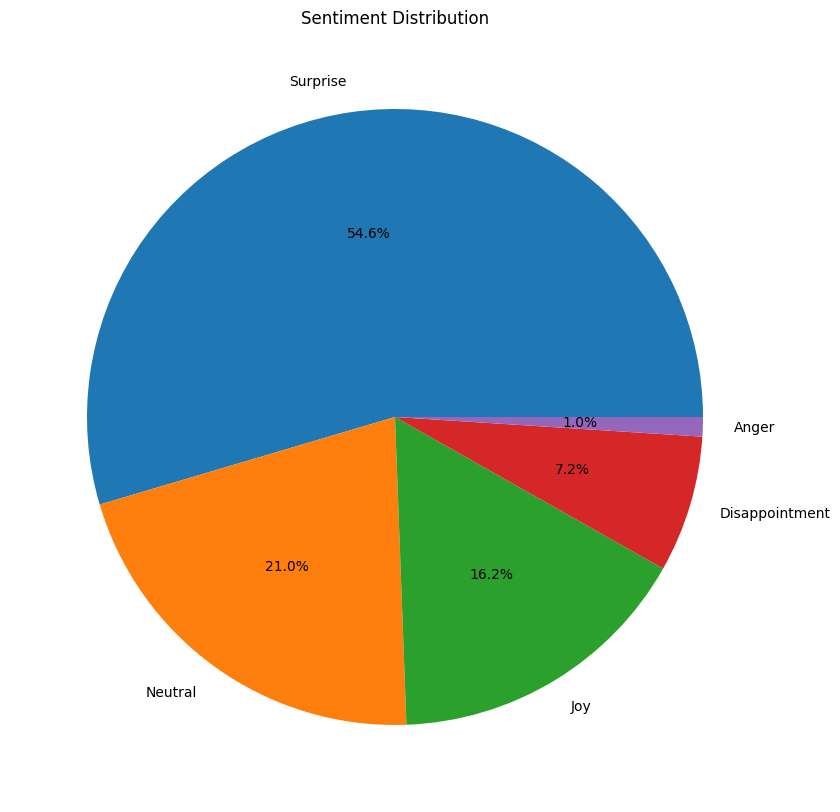

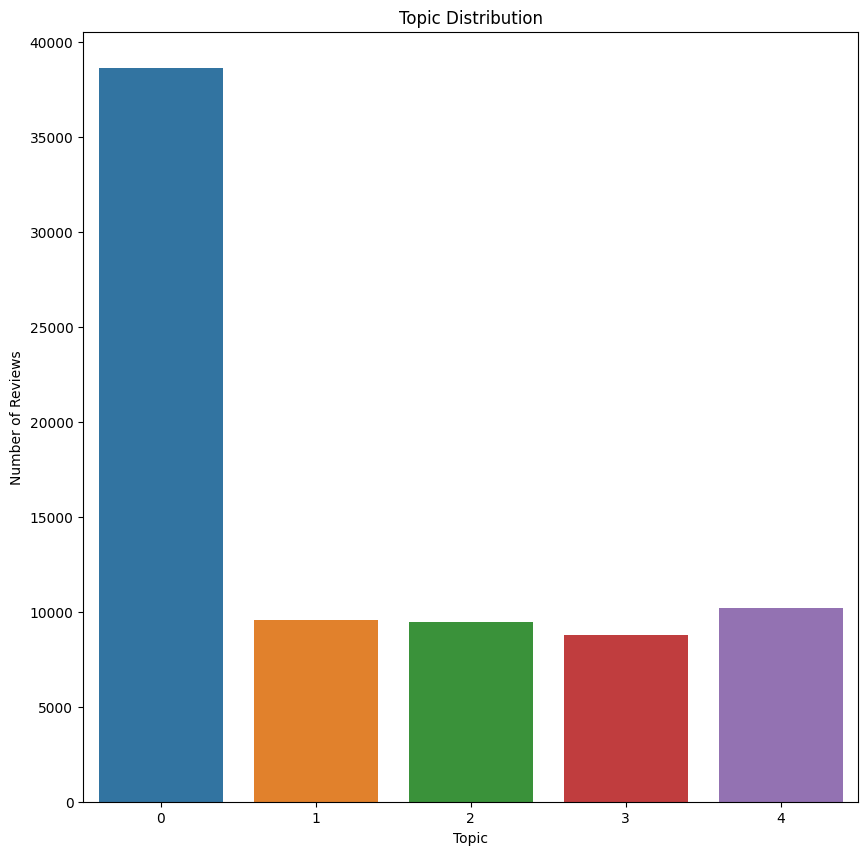

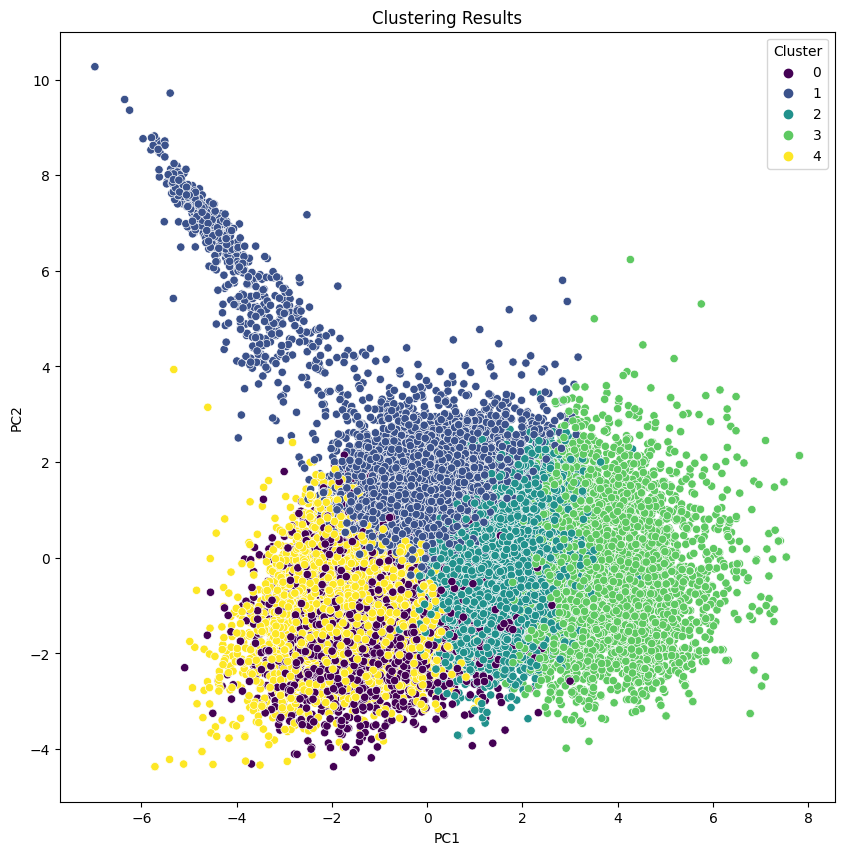

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 情感分布图
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

# 主题分布图
topic_counts = df['Topic'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.show()

# 聚类结果可视化
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

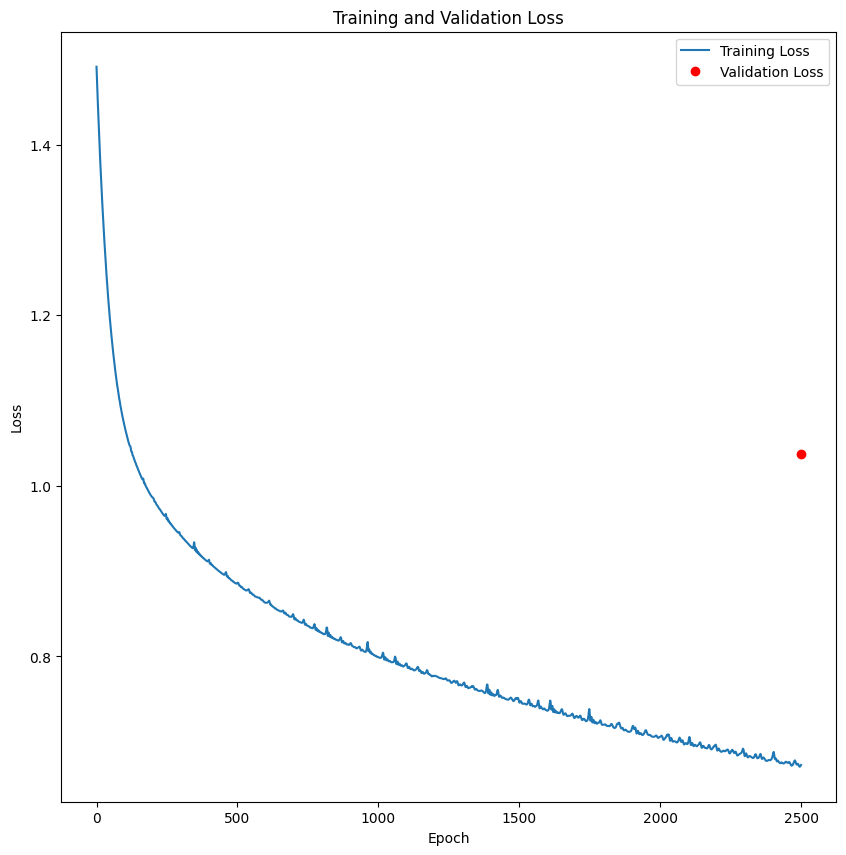

In [11]:
# 模型训练过程可视化
plt.figure(figsize=(10, 10))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(len(train_losses)-1, val_losses[0], 'ro', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# 保存Word2Vec模型
word2vec.save("word2vec.model")

# 保存情感主题预测模型
torch.save(model.state_dict(), "sentiment_model.pth")

c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Sy X\anaconda3\Lib\site-packages\sklearn\cluster\_k

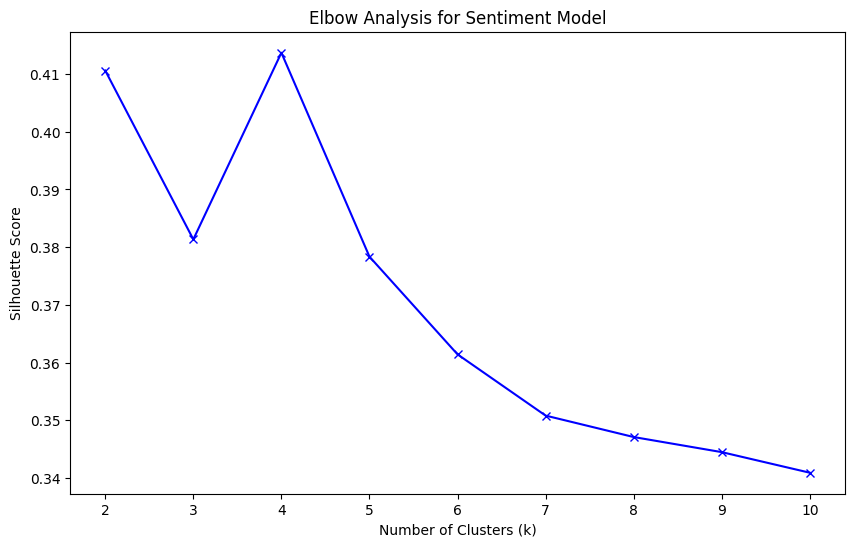

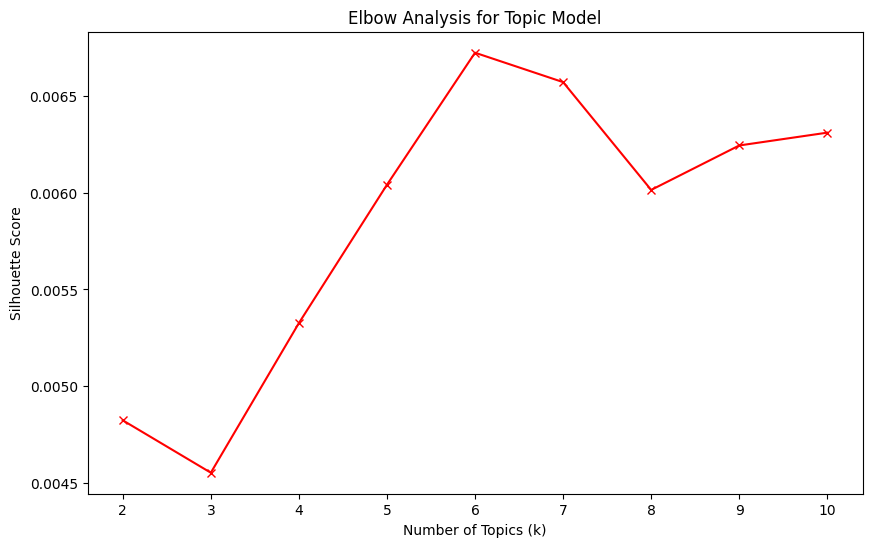

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 情感模型的肘部分析
sentiment_sil_scores = []
sentiment_k_range = range(2, 11)

for k in sentiment_k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df[['Polarity', 'Subjectivity']])
    labels = kmeans.labels_
    sil_score = silhouette_score(df[['Polarity', 'Subjectivity']], labels)
    sentiment_sil_scores.append(sil_score)

plt.figure(figsize=(10, 6))
plt.plot(sentiment_k_range, sentiment_sil_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Analysis for Sentiment Model')
plt.show()

# 主题模型的肘部分析
topic_sil_scores = []
topic_k_range = range(2, 11)

for k in topic_k_range:
    nmf_model = NMF(n_components=k, random_state=42).fit(tfidf)
    topic_labels = nmf_model.transform(tfidf).argmax(axis=1)
    sil_score = silhouette_score(tfidf, topic_labels)
    topic_sil_scores.append(sil_score)

plt.figure(figsize=(10, 6))  
plt.plot(topic_k_range, topic_sil_scores, 'rx-')
plt.xlabel('Number of Topics (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Analysis for Topic Model')
plt.show()

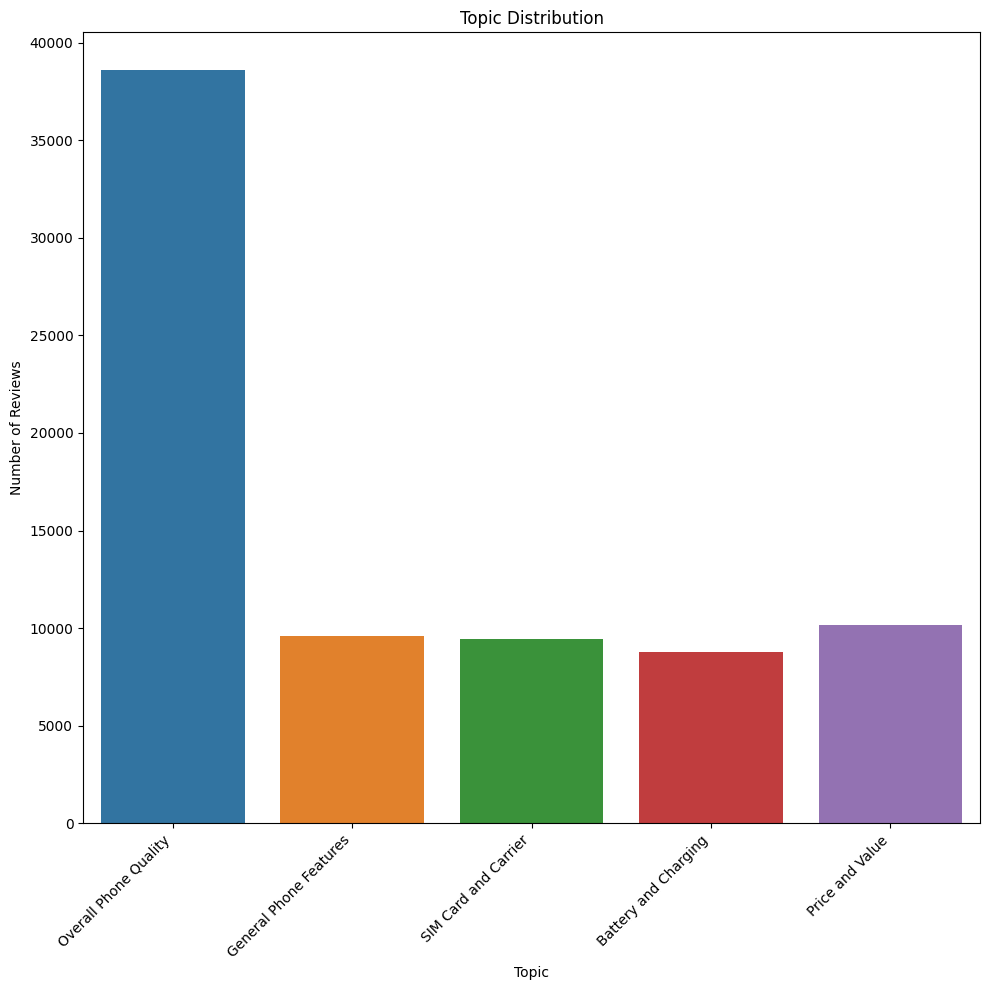

In [16]:
topic_labels = [
    "Overall Phone Quality",
    "SIM Card and Carrier",
    "Battery and Charging", 
    "Price and Value",
    "General Phone Features"
]

# 主题分布图
topic_counts = df['Topic'].value_counts()
plt.figure(figsize=(10, 10))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')

# 在柱状图上添加主题标签
x_ticks_positions = range(len(topic_counts))
plt.xticks(x_ticks_positions, [topic_labels[i] for i in topic_counts.index], rotation=45, ha='right')

plt.tight_layout()
plt.show()

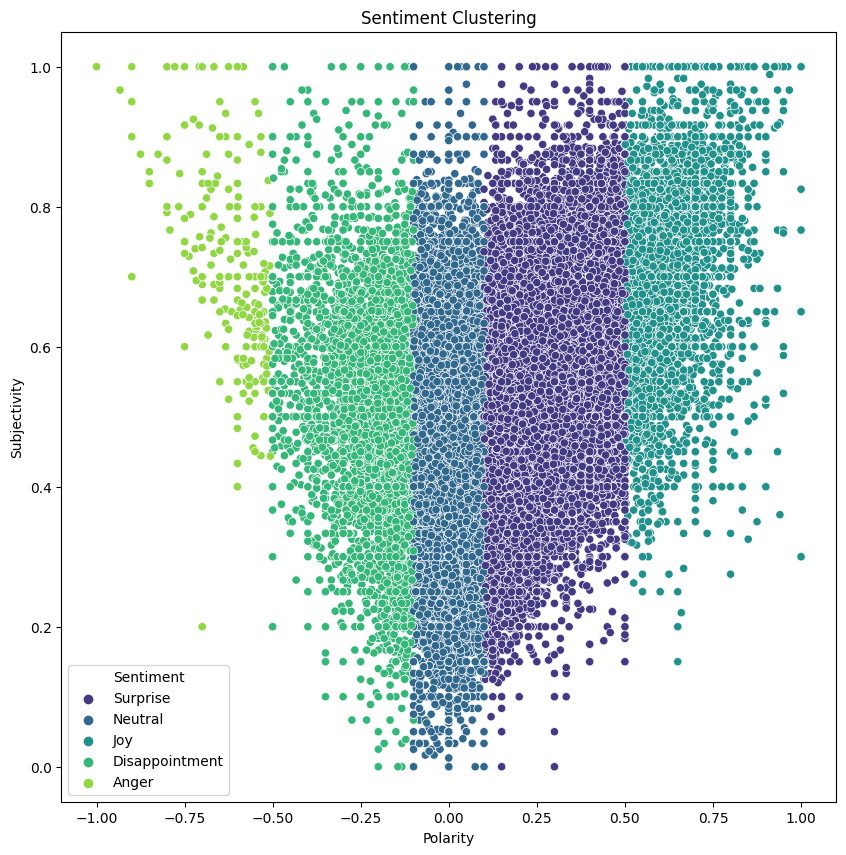

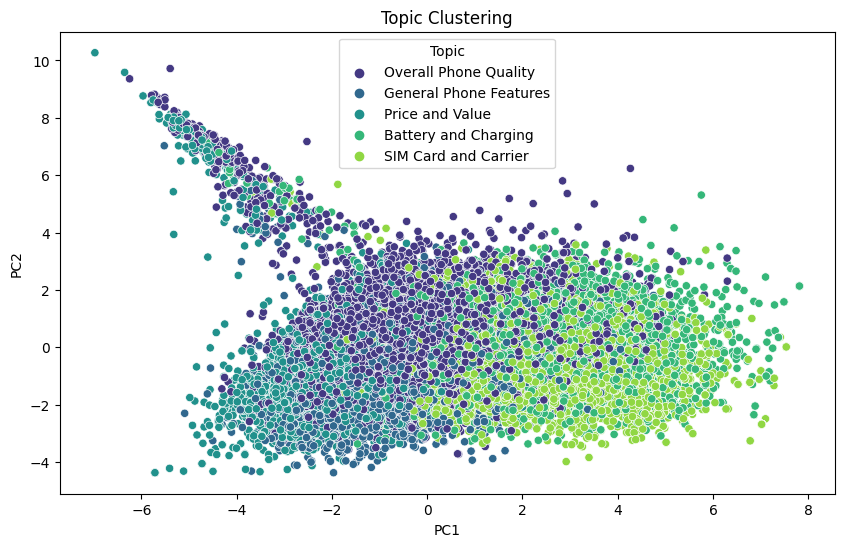

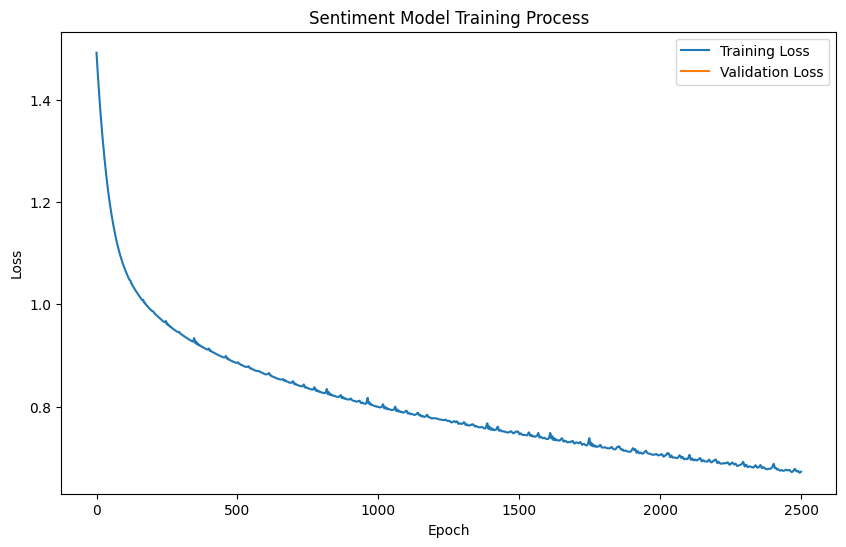

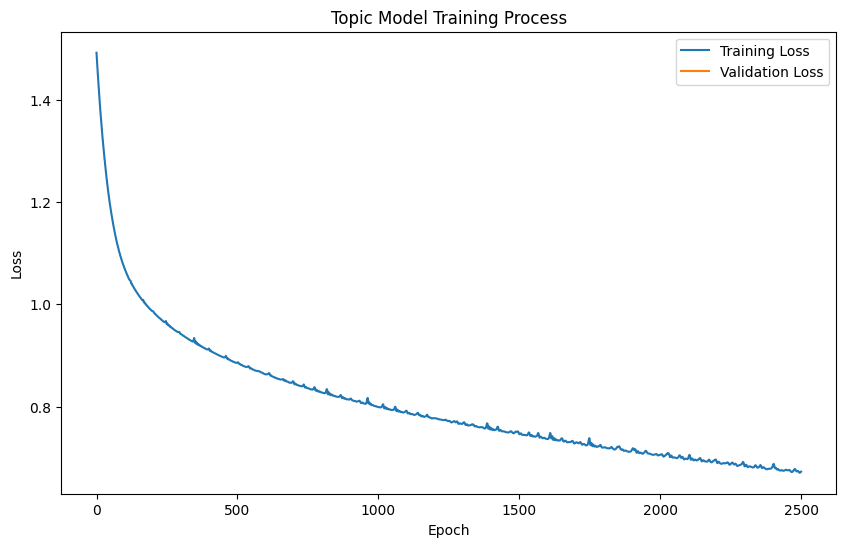

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 情感模型的聚类可视化
plt.figure(figsize=(10, 10))
sns.scatterplot(x=df['Polarity'], y=df['Subjectivity'], hue=df['Sentiment'], palette='viridis')
plt.title('Sentiment Clustering')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

# 主题模型的聚类可视化
topic_labels = [
    "Overall Phone Quality",
    "SIM Card and Carrier",
    "Battery and Charging",
    "Price and Value",
    "General Phone Features"
]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df['Topic'].map(lambda x: topic_labels[x]), palette='viridis')
plt.title('Topic Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# 情感模型的训练过程可视化
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Sentiment Model Training Process')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 主题模型的训练过程可视化
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.title('Topic Model Training Process')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()